# Project

#### Stefano Riato
#### Matricola ID: 894041
#### Ca' Foscari University of Venice
#### Project for Lab of Information Systems and Analytics
#### May 2024

# Summary of the Project Roadmap

1. **Load Dataset**
2. **Data Cleaning** 
3. **Exploratory Data Analysis (EDA)** 
4. **Data Pre-processing**
5. **Feature Engineering**
6. **Model Training, Hyper-Tuning parameters and Evaluation**
7. **Conclusions**



# Load Dataset

In [62]:
# Importing libraries and setting options
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt     # To plot graphs
import seaborn as sns               # To plot graphs
sns.set_style('whitegrid')          # To set the style of the graphs

pd.options.display.max_columns = 90 # To display all the columns of the dataframe   

In [63]:
data_full = pd.read_csv('../datasets/bank/bank-full.csv', sep=';')


# Data Cleaning

In this part we are going to:

- **Handling missing values**: I will identify columns with missing values and decide how to handle them, for example by deleting rows, filling with the mean or median, or using more advanced imputation methods.
- **Removing outliers**: I will use statistical methods to identify and remove outliers that could distort the analysis.
- **Coding of categorical variables**: I will transform the categorical variables into a format that can be used for analysis, for example using one-hot coding or label coding.
- **Data normalization**: If necessary, I will normalize the data to bring all variables to a common scale. 

In [64]:
# the shape of the dataset 
print('The dataset has {} rows and {} columns.'.format(data_full.shape[0], data_full.shape[1]))
print('\n')
# look at the first lines of the dataset
data_full.head()



The dataset has 45211 rows and 17 columns.




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [65]:
# look at the last lines of the dataset
data_full.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [66]:
# Get information about the dataset (data types, number of non-null values, etc.)
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


The dataset does not contain any NaN values. But we need to confirm that. So we use the code below:

In [67]:
# Check if there is some NaN values
if (data_full.isnull().values.any()) == True:
    print('There are NaN values in the dataset.')
else:
    print('There are no NaN values in the dataset.')

There are no NaN values in the dataset.


We investigate the dataset with some statistics:

In [68]:
data_full.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


We can notice that pdays has a lot of -1 values. We need to investigate this column.
So we use the code below to check the number of -1 values in the pdays column:

In [69]:
# data cleaning -> check if there are too many -1 in the pdays column in order to drop them or the column
data_full['pdays'].value_counts()

pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64

We can see that the column pdays has a lot of -1 values. This column is not useful for the prediction of the target variable y since it is not heterogeneous. So we can decide to drop it.

In [70]:
data_full = data_full.drop(['pdays'], axis=1)
data_full.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown,no


# Exploratory Data Analysis (EDA)

- **Univariate analysis**: I will examine the distribution of each variable, for example using histograms or box plots.
- **Bivariate analysis**: I will examine relationships between pairs of variables, for example using scatter plots or calculating correlation coefficients.
- **Multivariate analysis**: I will examine relationships between multiple variables, for example using correlation matrices or dimensionality reduction techniques such as principal component analysis (PCA).

First, we analyse the variable to predict, which is the column y (if the client will subscribe a term deposit or not). We can see if the problem is balanced. This will affect how we evaluate the models.

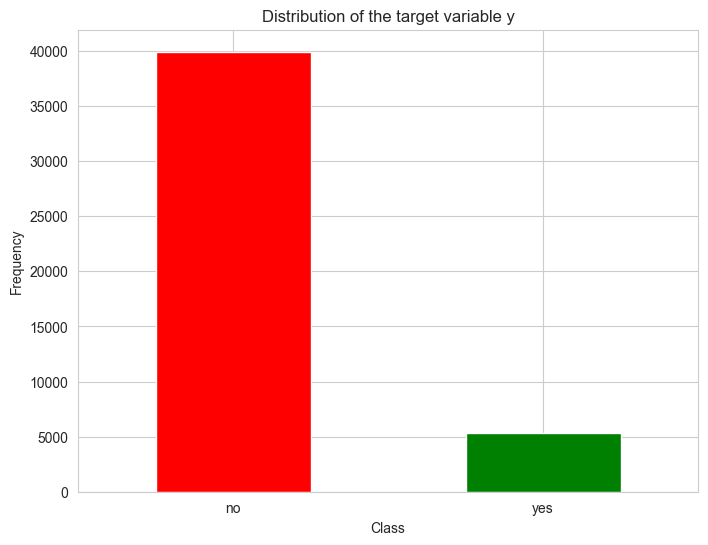

In [71]:
# frequency
y_counts = data_full['y'].value_counts()

# bar plt graph
plt.figure(figsize=(8, 6))
y_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of the target variable y')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


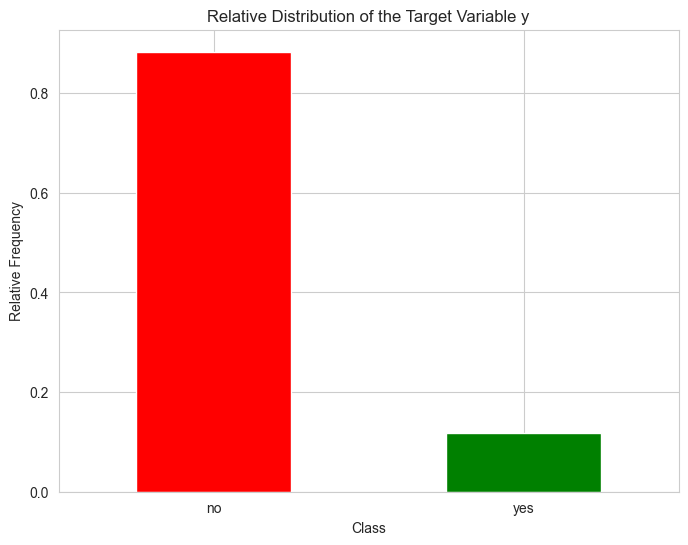

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

In [72]:
# Calculate the relative frequency of the target variable 'y'
y_relative_frequency = data_full['y'].value_counts(normalize=True)

# Plotting the relative frequency as a bar plot
plt.figure(figsize=(8, 6))
y_relative_frequency.plot(kind='bar', color=['red', 'green'])
plt.title('Relative Distribution of the Target Variable y')
plt.xlabel('Class')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

y_relative_frequency

We perfomed an univariate analysis of the target variable y (Graph 1). We can see that the dataset is unbalanced. The variable y has more or less *40.000* instances of the class 'no' and *5.000* instances of the class 'yes'. This is a problem because the model will be biased towards the class 'no' and it will not be able to predict the class 'yes' correctly.

From this graph we can see a relative frequency of *88.3%* of the class 'no' and only *11.7%* of the class 'yes'. So the dataset is imbalanced.

So we know that we need to use stratified cross-validation, using the *StratifiedKFold* class from the *sklearn.model_selection* module.

In this way we split the data such that the proportion between classes are the same in each fold as they are in the whole dataset.



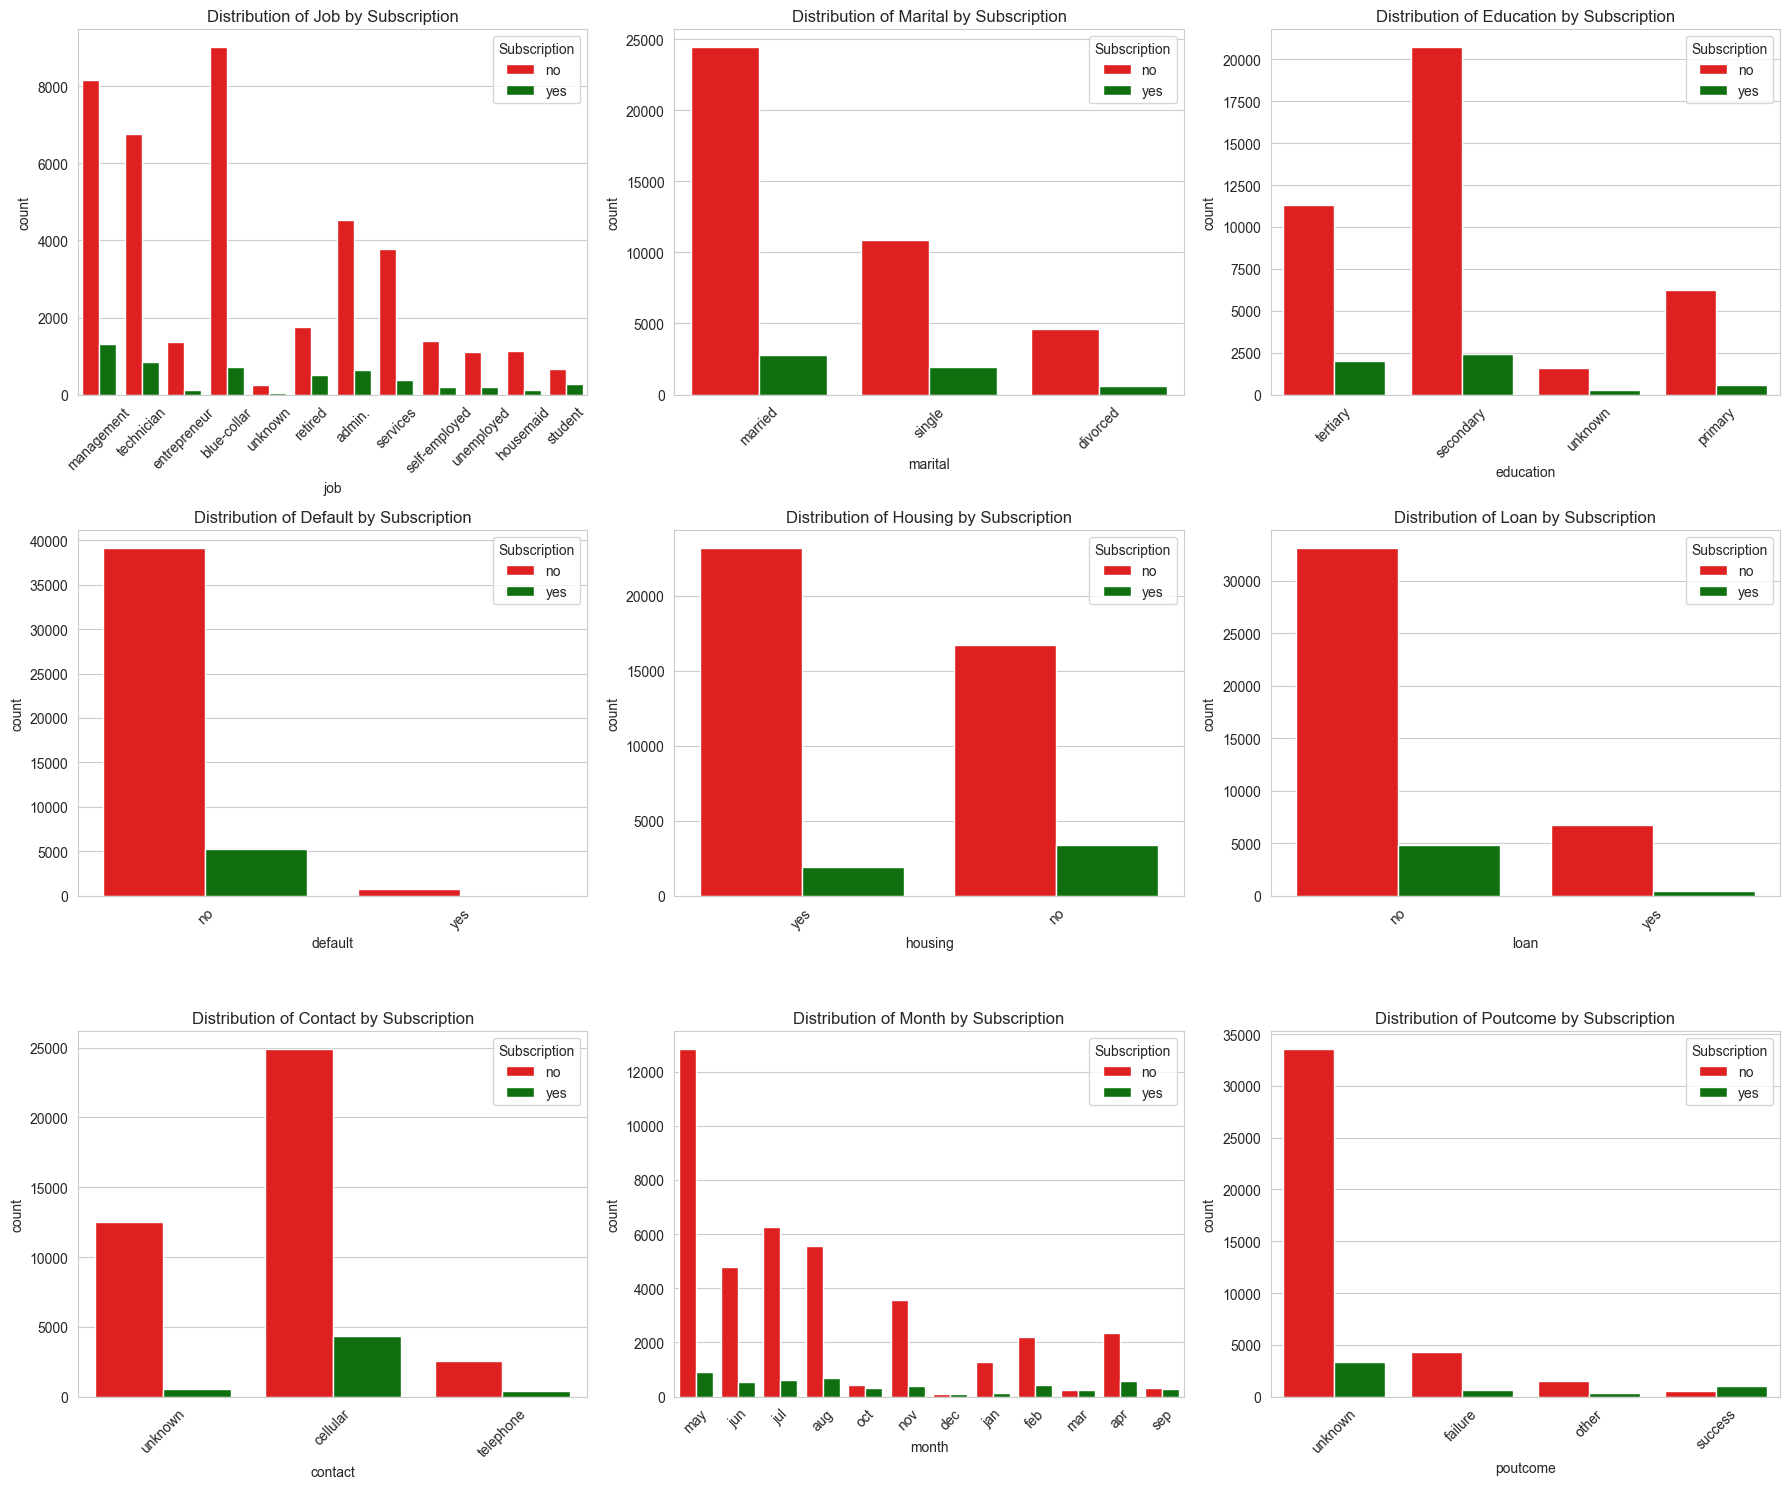

In [73]:
# Visualizing the distribution of categorical variables with respect to the target variable 'y'

fig, axs = plt.subplots(3, 3, figsize=(18, 15))
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for i, var in enumerate(cat_vars):
    row = i // 3
    col = i % 3
    sns.countplot(data=data_full, x=var, hue='y', ax=axs[row, col], palette=['red', 'green'])
    axs[row, col].set_title(f'Distribution of {var.capitalize()} by Subscription')
    axs[row, col].tick_params(axis='x', rotation=45)
    axs[row, col].legend(title='Subscription', loc='upper right')

fig.tight_layout()
plt.show()


 Here we can have a broader analysis among the categorical varible of the Dataset data_full. 

We need to analyse in deep for some **NaN**:

- poutcome -> missing values "unknown"
- contact -> missing values "unknown"
- educational -> missing values "unknown"

Let's analyse in deep the two feature:

In [74]:
data_full['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [75]:
data_full['contact'].value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [76]:
data_full['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In this moment we are in front of a scenario in which we need to deal with these 3 variables. We can be sure to drop **poutcome** and **education**: in **poutcome** there are many 'unknown" in relation of the total number of the rows (36.959); we can instead drop the rows in **education**;

Instead for contact we need to understand better and analyse the problem. There are 13020. 

In [77]:
data_full = data_full[data_full['education'] != 'unknown']
data_full['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64

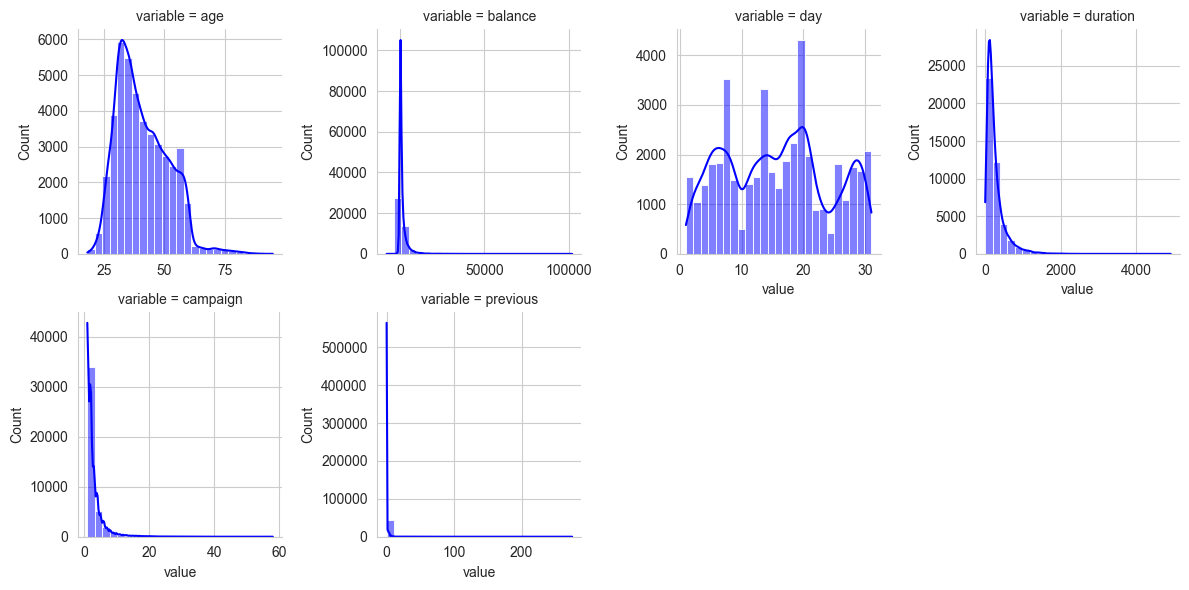

In [78]:
# Create a dataframe with only the numerical variables
data_num = data_full.select_dtypes(include=['int64', 'float64'])
# Melt the data into a long format so that I can plot the distribution of all numerical variables
pd.melt(data_full, value_vars=data_num.columns).groupby('variable').describe()

# Let's plot the distribution of all numerical variables
# Melt the data into a long format so that I can plot the distribution of all numerical variables
melt = pd.melt(data_full, value_vars=data_num.columns) 

# Wrap the columns to make it easier to read
g = sns.FacetGrid(melt, col="variable",  col_wrap=4, sharex=False, sharey=False) 

# Plot the distribution of each variable
g = g.map(sns.histplot, "value", bins=25, color="blue", kde=True)

c:\Users\User\.pyenv\pyenv-win\versions\3.9.1\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


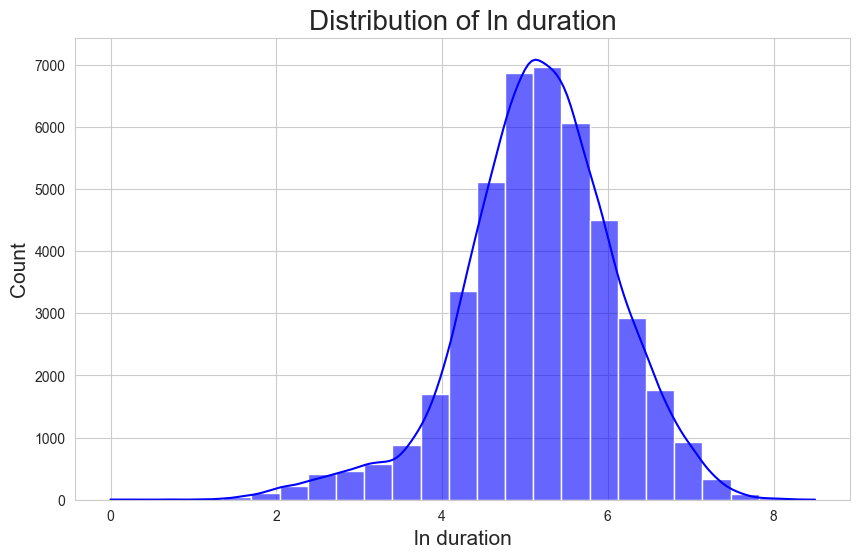

In [79]:
name = 'duration'
plt.figure(figsize=(10,6))
sns.histplot(np.log(data_full[name]), bins=25, kde=True, color='blue', alpha=0.6)
plt.title(f'Distribution of ln {name}', fontsize=20)
plt.xlabel(f'ln {name}', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show();

There are some continuos features that need to be analysed in deep. Age and Day are more clear and we are able to understand the distributions. Duration instead is skewed to the left, because duration of the calls does not last too much time. 


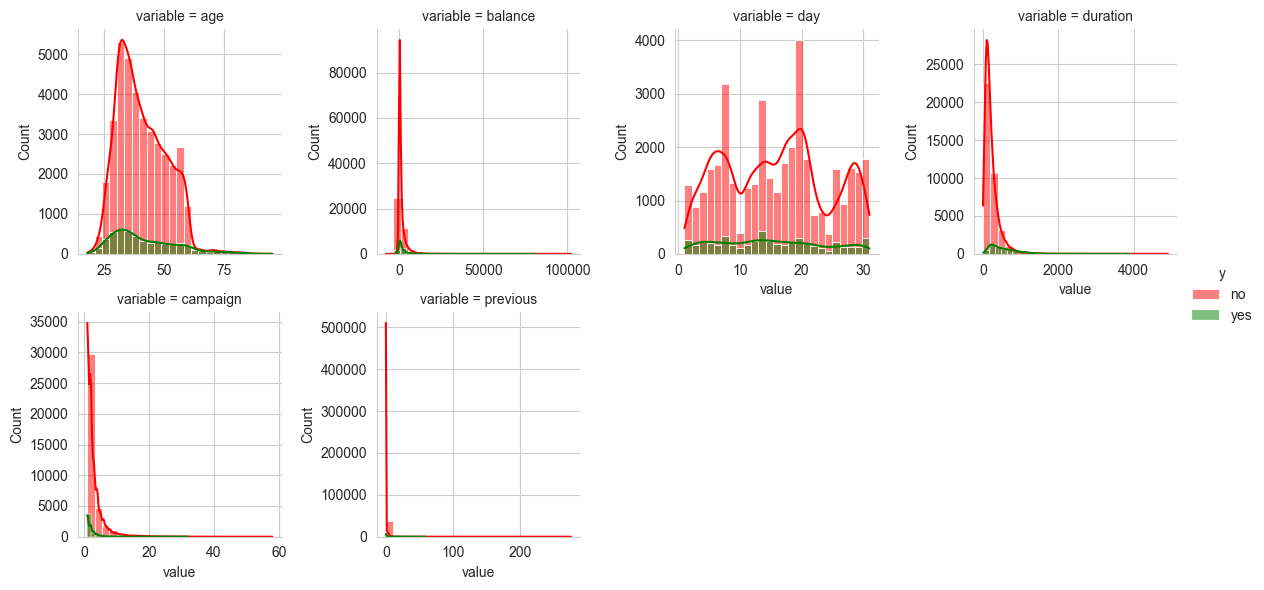

In [80]:
data_num = data_full.select_dtypes(include=['int64', 'float64'])

melt = pd.melt(data_full, id_vars='y', value_vars=data_num.columns)

g = sns.FacetGrid(melt, col="variable", hue="y", col_wrap=4, sharex=False, sharey=False, palette={'yes': 'green', 'no': 'red'})

g = g.map(sns.histplot, "value", bins=25, kde=True).add_legend()


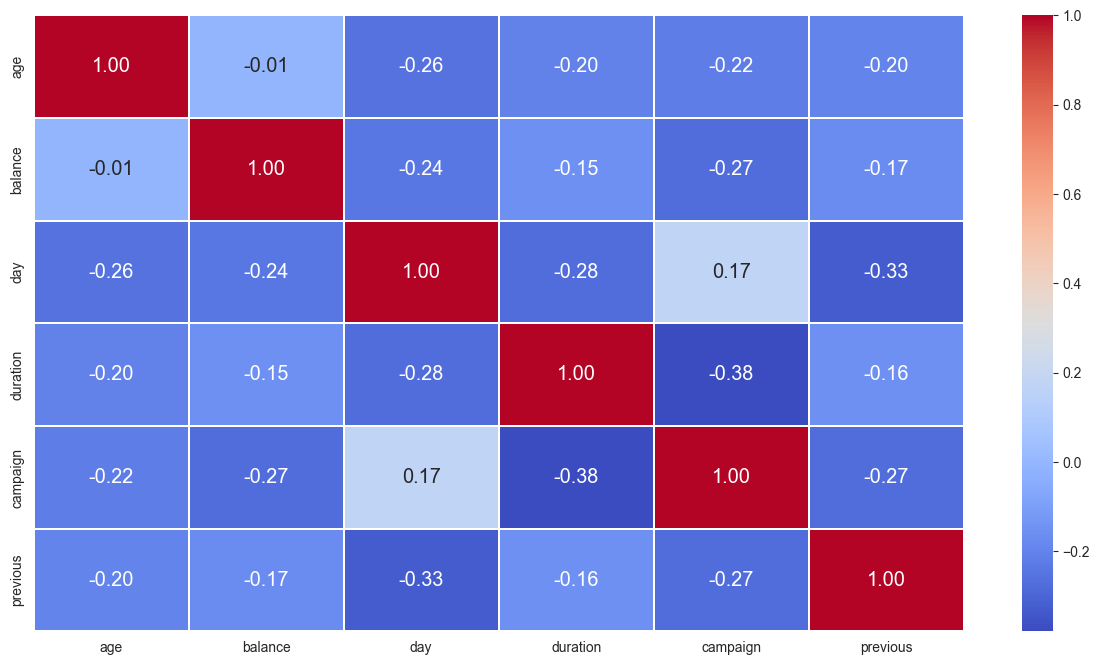

In [81]:
corr = data_full.select_dtypes(include=['int64', 'float64']).corr()

# Let's see the correlation between the numerical variables
# I will use the heatmap function from the seaborn library
# Select only numeric columns

# Now you can calculate the correlation
plt.figure(figsize=(15,8))

sns.heatmap(corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2, 
    annot_kws={"size": 35 / np.sqrt(len(corr.corr()))})

plt.show();

In [126]:
data_full = data_full.drop('poutcome', axis=1)


In [127]:
data_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,0,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,0,no


# Pre-Processing Data

## Investigate the distribution of nominal features

We are going to check how many nominal, ordinal, continuous and discrete features there are in the dataset.

In [82]:
# Investigate the distribution of nominal features

# Count how many nominal, ordinal, continuous and discrete features there are in the dataset
nominal = 0
ordinal = 0
continuous = 0
discrete = 0
for col in data_full.columns:
    if data_full[col].dtype == 'object':
        #print(f'{col} is a nominal feature')
        nominal += 1
    elif data_full[col].dtype == 'int64':
        #print(f'{col} is a discrete feature')
        discrete += 1
    elif data_full[col].dtype == 'float64':
    
        continuous += 1
    else:
        ordinal += 1

print('There are {} nominal features, {} ordinal features, {} continuous features and {} discrete features.'.format(nominal, ordinal, continuous, discrete))

There are 10 nominal features, 0 ordinal features, 0 continuous features and 6 discrete features.


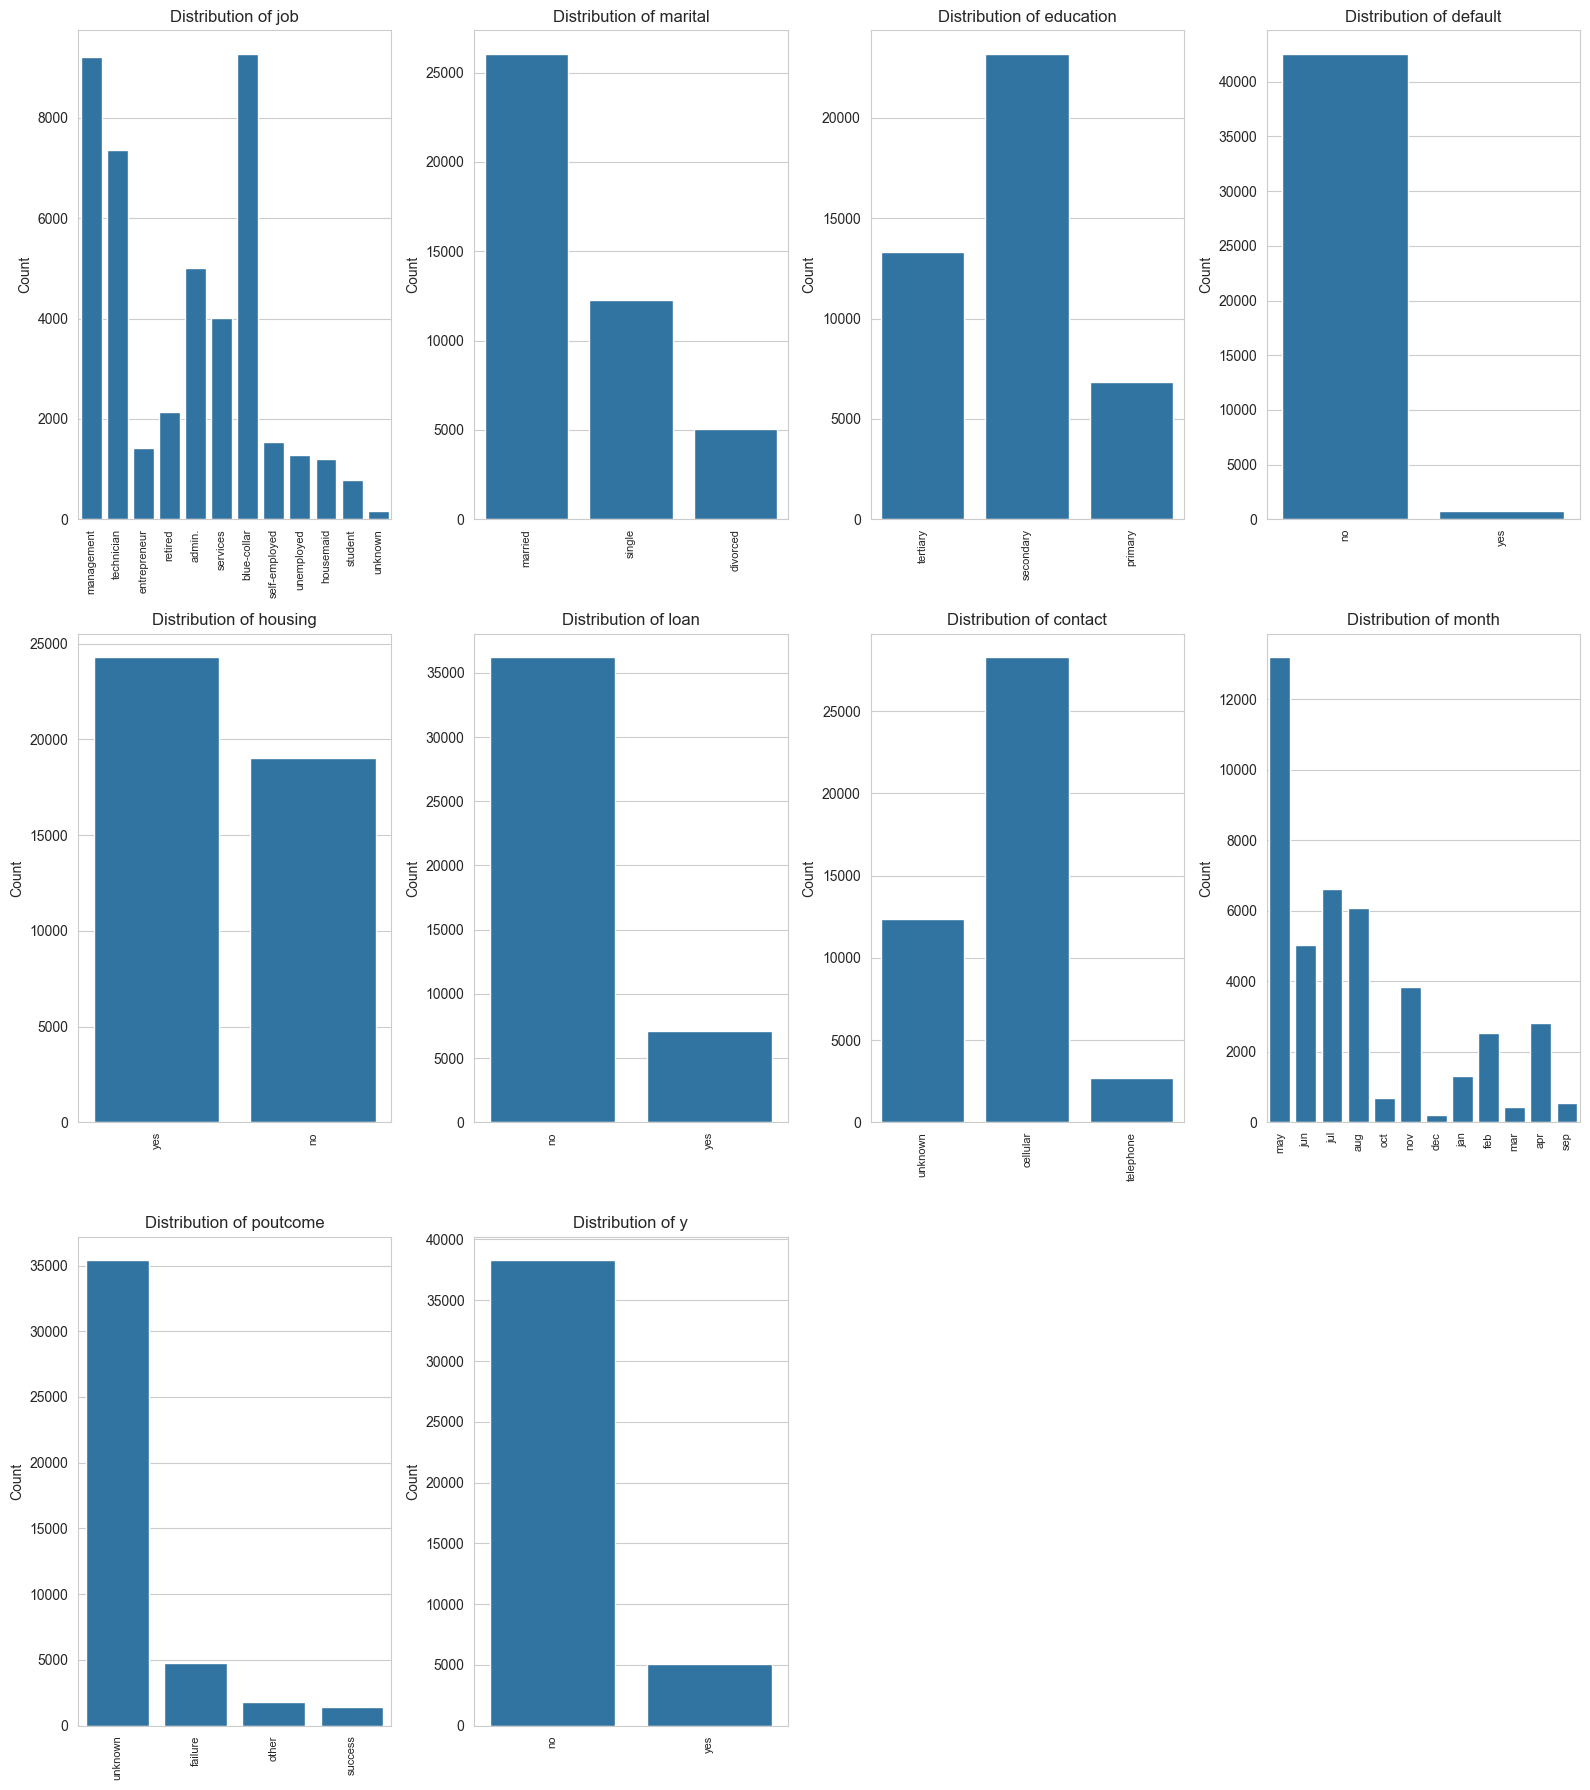

In [83]:
# Suppress FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# First of all, I need to select the norminal features
nominal_features = list(col for col in data_full.columns if data_full[col].dtype == 'object')

# Then, I can plot the distribution of each norminal feature in a subplot figure
n_cols = 4 
n_rows = int(np.ceil(len(nominal_features) / n_cols)) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*6)) 
# flatten the axes array to 1-d
axes = axes.ravel() 
for i, col in enumerate(nominal_features):
    sns.countplot(x=col, data=data_full, ax=axes[i]) 
    axes[i].set_title(f'Distribution of {col}') 
    # smaller font for x-tick labels
    plt.setp(axes[i].get_xticklabels(), rotation=90, fontsize=8) 
    # remove the x-axis label and set the label padding
    axes[i].set_xlabel('', labelpad=10)
    axes[i].set_ylabel('Count')

# if there are more subplots than features to plot, hide the empty subplots
if n_cols*n_rows > len(nominal_features): 
    for i in range(len(nominal_features), n_cols*n_rows):
        axes[i].axis('off')

# adjust the subplot layout to fill the figure area
plt.tight_layout() 
plt.show()

We do not have any ordinal features. So we can use the one-hot encoding method to encode the nominal features.

## One-hot encoding


In [84]:
# Creating an empty list to store the nominal features
nominal_features = []

print('The nominal features are:')
for i in data_full.select_dtypes(include=['object']).columns:
    print('-', i)
    # Creating a list with the nominal features, to use it later
    nominal_features.append(i)

The nominal features are:
- job
- marital
- education
- default
- housing
- loan
- contact
- month
- poutcome
- y


In [85]:
df_dummy = data_full.copy()
df_dummy = pd.get_dummies(data_full, columns=nominal_features)

# Checking the shape of the dataframe
print('The shape of the dataframe is:', data_full.shape[0], 'rows and', data_full.shape[1], 'features.')
print('The shape of the dataframe with dummy variables is:', df_dummy.shape[0], 'rows and',
    df_dummy.shape[1], 'features.')

The shape of the dataframe is: 43354 rows and 16 features.
The shape of the dataframe with dummy variables is: 43354 rows and 51 features.


In [86]:
df_dummy.head()

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,261,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False
1,44,29,5,151,1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False
2,33,2,5,76,1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False
5,35,231,5,139,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False
6,28,447,5,217,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False


In [87]:
df_dummy.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'default_no', 'default_yes', 'housing_no', 'housing_yes',
       'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no', 'y_yes'], dtype=object)

Again we check for high correlation...

In [88]:
df_dummy.corr().abs()

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
age,1.000000,0.097132,0.008941,0.005296,0.004241,0.001175,0.058377,0.043060,0.021280,0.086258,0.023835,0.446815,0.007049,0.065836,0.185733,0.069156,0.002328,0.029631,0.168295,0.280905,0.425184,0.209323,0.083528,0.075229,0.016206,0.016206,0.186032,0.186032,0.010794,0.010794,0.061364,0.162946,0.022755,0.028818,0.072733,0.023926,0.000173,0.009715,0.003932,0.051317,0.020441,0.128220,0.035203,0.056860,0.034546,0.002755,0.022741,0.031593,0.000719,0.024187,0.024187
balance,0.097132,1.000000,0.004229,0.019802,0.016307,0.016503,0.027946,0.047125,0.009925,0.001168,0.070382,0.049210,0.018608,0.040276,0.000645,0.017729,0.009530,0.006462,0.021990,0.026171,0.012809,0.014861,0.070718,0.088237,0.066481,0.066481,0.067344,0.067344,0.084479,0.084479,0.015612,0.038392,0.037088,0.015775,0.007707,0.018095,0.003916,0.024212,0.065786,0.029262,0.024094,0.069608,0.117927,0.040170,0.023432,0.012471,0.008925,0.034206,0.030430,0.051005,0.051005
day,0.008941,0.004229,1.000000,0.029727,0.165020,0.052230,0.011929,0.024619,0.002403,0.004301,0.020198,0.008661,0.005302,0.010110,0.012110,0.032711,0.006513,0.006291,0.000167,0.006049,0.006695,0.020071,0.006080,0.022451,0.008585,0.008585,0.029466,0.029466,0.011233,0.011233,0.018237,0.021146,0.030596,0.046623,0.033109,0.010747,0.285821,0.249247,0.144890,0.196908,0.019366,0.023325,0.096908,0.030001,0.052020,0.070080,0.033479,0.031748,0.088315,0.030061,0.030061
duration,0.005296,0.019802,0.029727,1.000000,0.083275,0.000587,0.016729,0.010406,0.001532,0.006668,0.008580,0.025709,0.007682,0.000892,0.004750,0.009140,0.019141,0.007869,0.004646,0.022292,0.020932,0.003805,0.002022,0.000823,0.011027,0.011027,0.004377,0.004377,0.012695,0.012695,0.025170,0.023870,0.013738,0.040021,0.041020,0.017828,0.008955,0.008965,0.015233,0.019318,0.003768,0.006813,0.005724,0.013699,0.014204,0.019455,0.000770,0.041584,0.003135,0.397331,0.397331
campaign,0.004241,0.016307,0.165020,0.083275,1.000000,0.032659,0.022895,0.007431,0.002052,0.003795,0.018964,0.031179,0.006720,0.006725,0.020849,0.022691,0.020248,0.010714,0.015891,0.030626,0.021993,0.010479,0.020786,0.014192,0.016260,0.016260,0.026215,0.026215,0.010106,0.010106,0.030049,0.052642,0.003436,0.069338,0.156056,0.012996,0.030906,0.063416,0.101907,0.042855,0.019567,0.068284,0.085706,0.050953,0.037568,0.089062,0.020290,0.057217,0.108621,0.072840,0.072840
previous,0.001175,0.016503,0.052230,0.000587,0.032659,1.000000,0.015210,0.015928,0.008168,0.016219,0.017605,0.005194,0.003036,0.010682,0.023777,0.000586,0.009283,0.004243,0.004557,0.012380,0.016704,0.017664,0.007603,0.022195,0.017879,0.017879,0.036940,0.036940,0.011248,0.011248,0.129789,0.028444,0.152212,0.053189,0.053599,0.036550,0.064604,0.047460,0.083438,0.059055,0.027470,0.003139,0.036961,0.052888,0.064835,0.348991,0.305940,0.198166,0.529672,0.092295,0.092295
job_admin.,0.058377,0.027946,0.011929,0.016729,0.022895,0.015210,1.000000,0.188401,0.066224,0.060788,0.187600,0.082375,0.069291,0.115174,0.048712,0.163202,0.062824,0.022044,0.034018,0.061757,0.042943,0.115044,0.223418,0.150636,0.011552,0.011552,0.043263,0.043263,0.032156,0.032156,0.000341,0.011394,0.006479,0.020649,0.073888,0.000070,0.003908,0.006690,0.017345,0.003304,0.014936,0.026121,0.009933,0.012485,0.009185,0.018814,0.012132,0.013779,0.027749,0.007230,0.007230
job_blue-collar,0.043060,0.047125,0.024619,0.010406,0.007431,0.015928,0.188401,1.000000,0.095705,0.0878

Let's take a look at the correlations among the features:


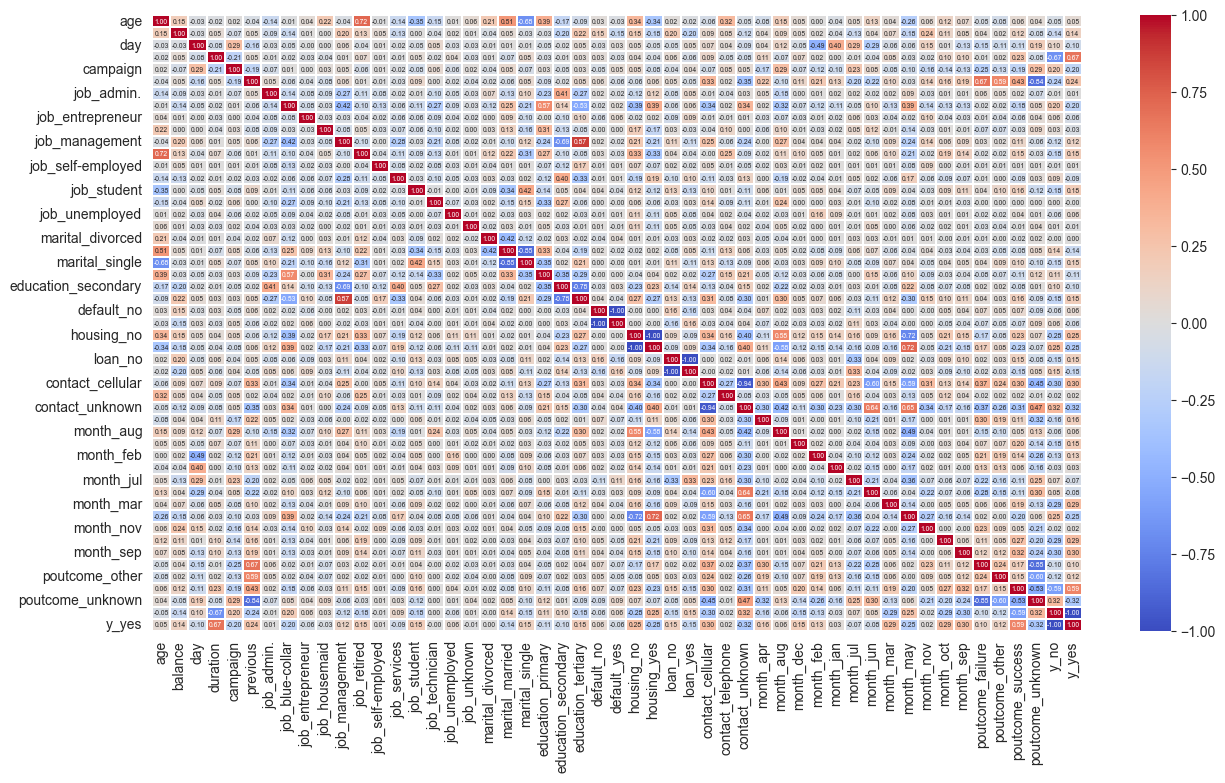

In [89]:
corr = df_dummy.corr()

# Now you can calculate the correlation
plt.figure(figsize=(15,8))

sns.heatmap(corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2, 
    annot_kws={"size": 35 / np.sqrt(len(corr.corr()))})

plt.show();

We need to extract the top 15 correlated pairs of features in order to drop them. I consider as benchmark 0.7 since it measures as a higher correlation.



In [90]:
corr = df_dummy.corr() #df_dummy is the dataframe with the dummy variables
# we set the diagonal to zero
for i in range(len(corr)):
    corr.iloc[i,i] = 0  # we do not want to consider the self correlation among the variables


top_corr = corr.abs().unstack().sort_values(ascending=False) #trasforma un DataFrame o una Serie con un indice MultiLivello in un nuovo DataFrame con un indice meno annidato.
top_corr = top_corr[top_corr > 0.70]
top_corr

loan_no              loan_yes               1.000000
loan_yes             loan_no                1.000000
y_no                 y_yes                  1.000000
y_yes                y_no                   1.000000
default_no           default_yes            1.000000
default_yes          default_no             1.000000
housing_yes          housing_no             1.000000
housing_no           housing_yes            1.000000
contact_unknown      contact_cellular       0.864787
contact_cellular     contact_unknown        0.864787
marital_single       marital_married        0.770674
marital_married      marital_single         0.770674
poutcome_unknown     poutcome_failure       0.739160
poutcome_failure     poutcome_unknown       0.739160
education_tertiary   education_secondary    0.713842
education_secondary  education_tertiary     0.713842
dtype: float64

In [91]:
to_be_removed = [i[0] for i in top_corr.index]
to_be_removed = set(to_be_removed)-set(['y_no', 'y_yes']) #remove the pairs of features that are correlated
to_be_removed



{'contact_cellular',
 'contact_unknown',
 'default_no',
 'default_yes',
 'education_secondary',
 'education_tertiary',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'marital_married',
 'marital_single',
 'poutcome_failure',
 'poutcome_unknown'}

In [92]:
#and drop one of them
df_dummy = df_dummy.drop(to_be_removed, axis=1)
df_dummy.head(5)

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,education_primary,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,y_no,y_yes
0,58,2143,5,261,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
1,44,29,5,151,1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
2,33,2,5,76,1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
5,35,231,5,139,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
6,28,447,5,217,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False


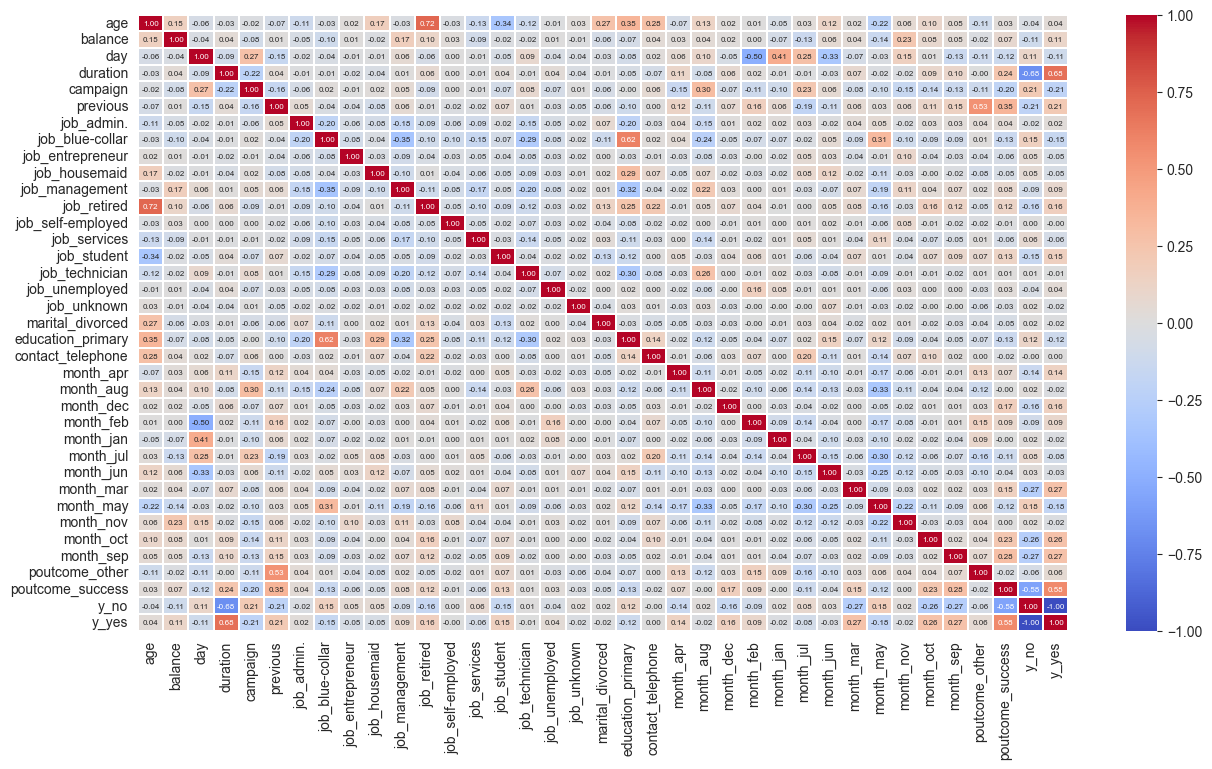

In [93]:
corr = df_dummy.corr()

# Now you can calculate the correlation
plt.figure(figsize=(15,8))

sns.heatmap(corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2, 
    annot_kws={"size": 35 / np.sqrt(len(corr.corr()))})

plt.show();

# Model Training

## Data Creation

It's now time to build our vectorial representation and create all the splits (train/validation/test)

In [95]:
df_dummy



,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,education_primary,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,y_no,y_yes
0,58,2143,5,261,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
1,44,29,5,151,1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
2,33,2,5,76,1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
5,35,231,5,139,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
6,28,447,5,217,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
45207,71,1729,17,456,2,0,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
45208,72,5715,17,1127,5,3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True
45209,57,668,17,508,4,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False


In [96]:
X = df_dummy.drop(['y_no', 'y_yes'], axis='columns')
y = df_dummy[['y_no', 'y_yes']]


In [97]:
X

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,education_primary,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,58,2143,5,261,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,44,29,5,151,1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,33,2,5,76,1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
5,35,231,5,139,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
6,28,447,5,217,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
45207,71,1729,17,456,2,0,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
45208,72,5715,17,1127,5,3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
45209,57,668,17,508,4,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [98]:
y

,y_no,y_yes
0,True,False
1,True,False
2,True,False
5,True,False
6,True,False
...,...,...
45206,False,True
45207,False,True
45208,False,True
45209,True,False


Before training the model, it is important to scale the data to avoid the dominance of the features with higher values.

Working with scaled data will also speed up the training process and will improve the performance of the model.

I will use StandardScaler of sklean to scale the data: this method will transform the data in such a way that the mean of the data will be 
0
 and the standard deviation will be 
1
, so as to have a normal distribution.

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler();
x = scaler.fit_transform(X)
X = pd.DataFrame(x, columns=X.columns)


We need also to formatting the y since it is a binary class

In [100]:
y = y.idxmax(axis=1)
y

0         y_no
1         y_no
2         y_no
5         y_no
6         y_no
         ...  
45206    y_yes
45207    y_yes
45208    y_yes
45209     y_no
45210     y_no
Length: 43354, dtype: object

In [101]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

X_train_80, X_test, y_train_80, y_test = train_test_split(X, y,
                                                          test_size=0.20, random_state=4)

# we select 0.25 of the training set as validation (i.e. 20% on the total dataset)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_80, y_train_80,
                                                      test_size=0.20 , random_state=1)

We split the data in a way that we obtain a 

In [102]:
print("Training set size:", len(X_train))
print("Validation set size:", len(X_valid))
print("Test set size:", len(X_test))

Training set size: 27746
Validation set size: 6937
Test set size: 8671


## KNeighborsClassifier

We start with a cross validation in order to check and evaluate the model for this dataset.


In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier()

# Define the StratifiedKFold strategy
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Perform cross-validation using the stratified folds
cv_scores = cross_val_score(knn, X_train_80, y_train_80, cv=stratified_cv)

# Print average score
print(f"Average accuracy from CV: {cv_scores.mean():.2%}")

# The individual fold scores
print(f"Scores from each fold: {cv_scores}")

Average accuracy from CV: 89.34%
Scores from each fold: [0.89649704 0.89058671 0.89332565 0.89158016 0.89489619]


In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score # we use the F1 score since the dataset is unbalanced

#we should evaluate which hypermarameter we want to explore. For the KNR we have just a few:
#- n_neighbors -> 5 - 50
#- weights -> ‘uniform’, ‘distance’
# Have a look at the documentation to know more about this algorithm.

n_neighbors = np.linspace(5,50,10).astype('int32')
weights = ['uniform','distance']

models = []
val_errors = []
train_errors = []

for cur_n_neighbors in n_neighbors: #hyperparameters to explore
 for cur_weights in weights:
    model = Pipeline([('scaler', preprocessing.StandardScaler()), ('cla', KNeighborsClassifier(n_neighbors=cur_n_neighbors, weights=cur_weights))])
    model.fit(X_train,y_train)
    models.append(model)

   

# compute F1 SCORE on train and validation
    train_err = f1_score(y_true=y_train, y_pred=model.predict(X_train), average='macro')  # 'macro' average per gestire il dataset sbilanciato
    valid_err = f1_score(y_true=y_valid, y_pred=model.predict(X_valid), average='macro')

    print(">> %.3f  %.3f" % (train_err,valid_err))
    train_errors += [train_err]
    val_errors += [valid_err]

>> 0.763  0.687
>> 1.000  0.688
>> 0.682  0.638
>> 1.000  0.669
>> 0.689  0.652
>> 1.000  0.658
>> 0.661  0.628
>> 1.000  0.652
>> 0.661  0.639
>> 1.000  0.645
>> 0.640  0.621
>> 1.000  0.637
>> 0.644  0.626
>> 1.000  0.632
>> 0.634  0.609
>> 1.000  0.620
>> 0.636  0.618
>> 1.000  0.624
>> 0.628  0.607
>> 1.000  0.618


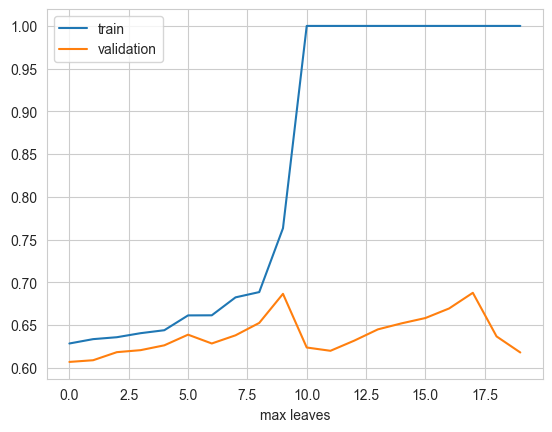

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

In [105]:
# plot validation vs test errors at increasing model complexity
idxs = np.argsort(train_errors) #we use the train errors as a measure of the model complexity

plt.figure()
plt.plot(np.asarray(train_errors)[idxs])
plt.plot(np.asarray(val_errors)[idxs])
plt.legend(['train','validation'])
plt.xlabel('max leaves')
plt.show()

n_neighbors

In [107]:
from sklearn.pipeline import Pipeline

# Define the StratifiedKFold strategy
stratified_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=4)

# Define a pipeline that includes scaling and classification
model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Perform cross-validation using the stratified folds
cv_scores = cross_val_score(model_pipeline, X_train_80, y_train_80, cv=stratified_cv, scoring='f1_macro')
print(f"Average F1 score from CV: {cv_scores.mean():.2%}")
print("Scores from each fold:", cv_scores)

Average F1 score from CV: 67.85%
Scores from each fold: [0.6739326  0.67541165 0.68421427 0.68053903]


# Decision tree

## Grid search

### DecisionTreeClassifier

We have many dimensions, that are 36. The Observation of this dataset cannot be visualized in a 2 dimensional plane, and we are going to rely just on the classification metrics to choose the best hyper-parameters for the model.

In [108]:
print(X.shape)
print(y.shape)

(43354, 35)
(43354,)


We have already split the dataset in the train set, validation set and test set.

We now need to choose the best set of hyperparameters for the DecisionTreeClassifier.
We will investigate them through a *grid-search strategy*: we will try all the possible combinations of the hyperparameters and we will choose the one that gives the best validation accuracy.

The procedure is:
1. For each combination of hyperparameters:
- we train a DecisionTreeClassifier
- we compute the accuracy on the validation set
- we keep the combination that gives the best validation accuracy
- we finally train a DecisionTreeClassifier on the whole training set and we compute the accuracy on the test set.

2. Once we have explored the grid:
- pick the model with the hieghest validation score
- train a DecisionTreeClassifier on the whole training set
- compute the accuracy on the test set



Leaves:  2 - Train Accuracy: 0.8829381 - Validation Accuracy: 0.8878478
Leaves:  4 - Train Accuracy: 0.8910834 - Validation Accuracy: 0.8923166
Leaves:  6 - Train Accuracy: 0.9012470 - Validation Accuracy: 0.9003892
Leaves:  8 - Train Accuracy: 0.9028689 - Validation Accuracy: 0.9026957
Leaves: 10 - Train Accuracy: 0.9028689 - Validation Accuracy: 0.9026957
Leaves: 12 - Train Accuracy: 0.9028689 - Validation Accuracy: 0.9026957
Leaves: 14 - Train Accuracy: 0.9028689 - Validation Accuracy: 0.9026957
Leaves: 16 - Train Accuracy: 0.9028689 - Validation Accuracy: 0.9026957
Leaves: 18 - Train Accuracy: 0.9028689 - Validation Accuracy: 0.9026957
Leaves: 20 - Train Accuracy: 0.9028689 - Validation Accuracy: 0.9026957
Leaves: 22 - Train Accuracy: 0.9028689 - Validation Accuracy: 0.9026957
Leaves: 24 - Train Accuracy: 0.9028689 - Validation Accuracy: 0.9026957
Leaves: 26 - Train Accuracy: 0.9028689 - Validation Accuracy: 0.9026957
Leaves: 28 - Train Accuracy: 0.9028689 - Validation Accuracy: 0.

Text(0.5, 0, 'max leaves')

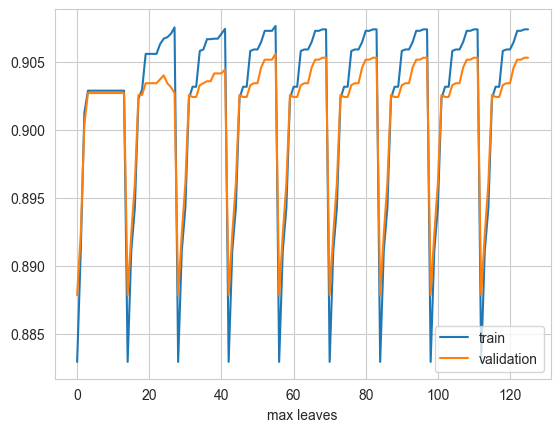

In [109]:
from sklearn.tree import DecisionTreeClassifier

val_accuracies = []
train_accuracies = []
leaves_vals = range(2,30, 2)
models=[]

for depth in range(3,30, 3):
  for max_leaves in leaves_vals:
    # train and predict
    df = DecisionTreeClassifier(max_leaf_nodes=max_leaves,max_depth=depth)
    df.fit(X_train,y_train)
    models.append(df)

    # compute Accuracy on train and validation
    train_acc = accuracy_score(y_true=y_train, y_pred=df.predict(X_train))
    valid_acc = accuracy_score(y_true=y_valid, y_pred=df.predict(X_valid))
    print ("Leaves: {:2d} - Train Accuracy: {:.7f} - Validation Accuracy: {:.7f}".format(
        max_leaves,  train_acc, valid_acc) )

    val_accuracies += [ valid_acc ]
    train_accuracies += [train_acc]

df = models[np.argmax(val_accuracies)]
print ( "Best Max Leaves", df.max_leaf_nodes, " - Best Max Depth", df.max_depth)

# we use both training and validation to build the final model, to exploit all training data
df.fit(X_train_80,y_train_80)

# Finally, evaluate on test set
test_acc = accuracy_score(y_true=y_test, y_pred=df.predict(X_test))
print ("Test Accuracy: {:.3f}".format(test_acc) )

# plot validation vs test accuracies
plt.figure()
plt.plot(train_accuracies)
plt.plot( val_accuracies)
plt.legend(['train','validation'])
plt.xlabel('max leaves')

Comment:
- **overfitting**: the blue line tends to have a higher accuracy;
- We have a small differences between the train and the validation lines during the process

### Analysing decision tree
We can visualize the decision tree using the *export_graphviz* function from the *tree* module. This writes a .dot file that can be visualized using Graphviz. It is a fomat which stores graphs in a text file.

we set an option to color the nodes to reflect the majority class in each node and pass the class and features names so the tree can be properly labeled.

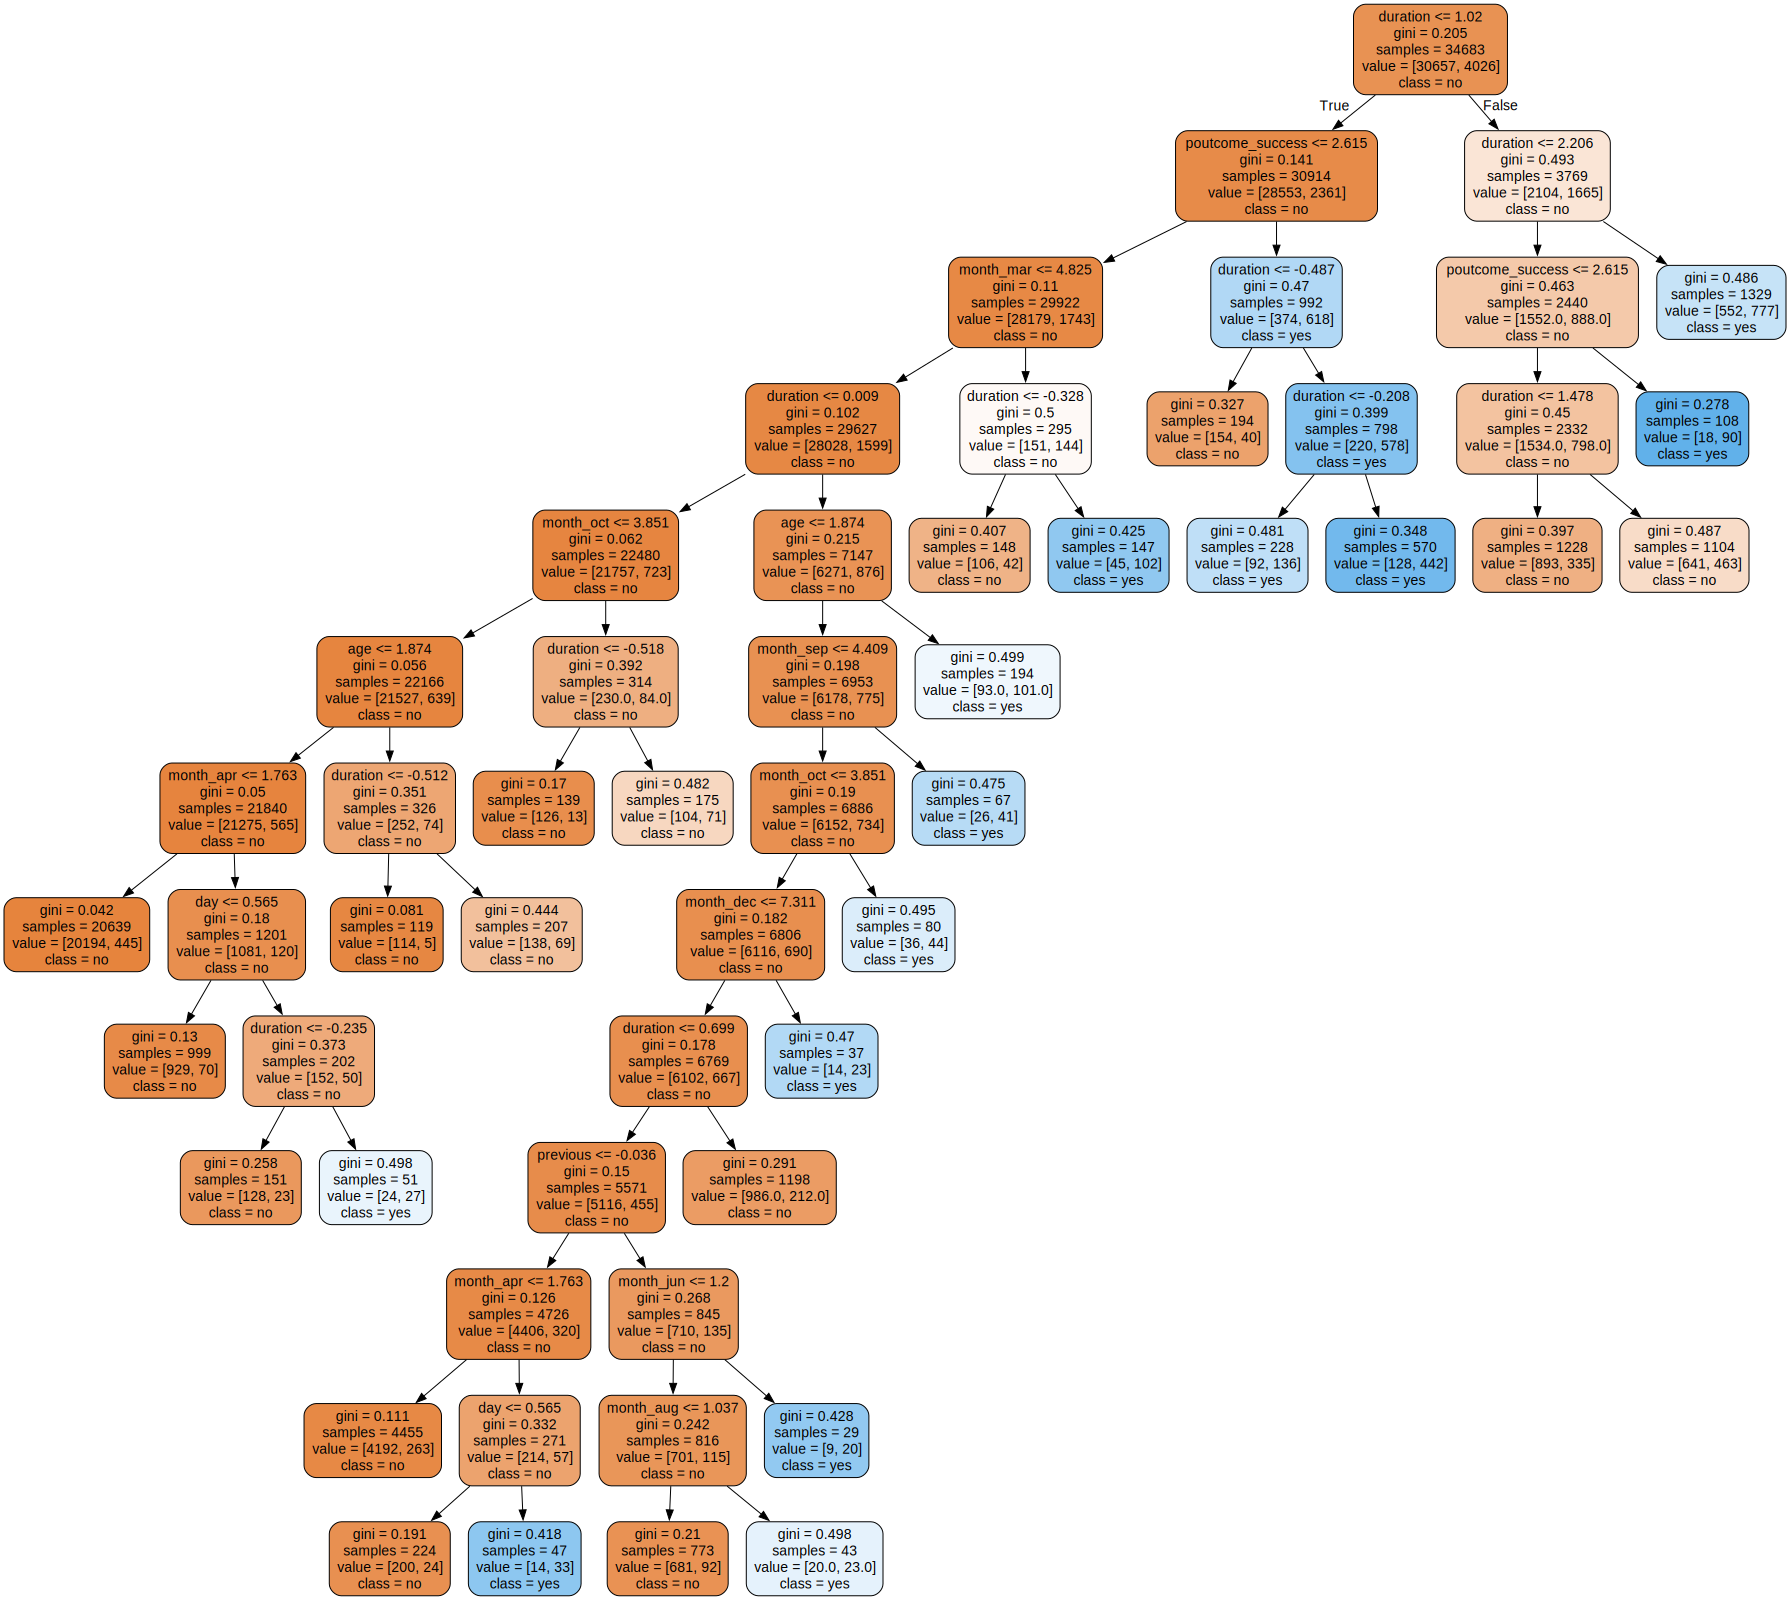

In [110]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a dot file
export_graphviz(df, out_file='tree.dot', feature_names=X.columns, class_names=['no', 'yes'], filled=True, rounded=True)

#visualize the decision tree
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph, format='png')


Since the tree decision graph is too big, we can summarize it by considering the most important features.




In [111]:
print(f'Features importance:\n {df.feature_importances_}')

Features importance:
 [0.03779237 0.         0.01614113 0.53828821 0.         0.00514838
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.01086245 0.00597098 0.00853408
 0.         0.         0.         0.00714691 0.04666669 0.
 0.         0.02843873 0.01436245 0.         0.28064763]


We can visualize the importance of the features in a bar plot.

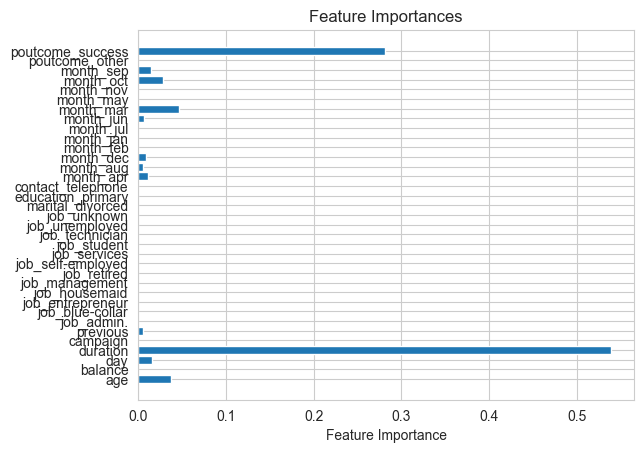

In [112]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel('Feature Importance')
    plt.title('Feature Importances')
    plt.draw()
    plt.show()

plot_feature_importances(df)



### RandomForestClassifier

A Random Forest is a meta-estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

The sub-sample size is controlled with the *max_samples* parameter if *bootstrap* is set to True. If *bootstrap* is set to False, the whole dataset is used to build the tree.

The *n_estimators* parameter is the number of trees in the forest.

The *max_depth* is the maximum depth of the tree.





In [113]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, max_depth=10)
forest.fit(X_train, y_train)

print(f'Accuracy on train set: {forest.score(X_train, y_train):.3f}')
print(f'Accuracy on test set: {forest.score(X_test, y_test):.3f}')

Accuracy on train set: 0.910
Accuracy on test set: 0.897


In [114]:
print(f'Importance of features: {forest.feature_importances_}')



Importance of features: [0.07008791 0.04288436 0.04869467 0.40248115 0.02039721 0.04769317
 0.00324904 0.00624867 0.00168092 0.00169316 0.0044054  0.00540987
 0.00234033 0.0023886  0.00812982 0.00344342 0.00260217 0.00059445
 0.00516914 0.00494284 0.00494389 0.01007447 0.00863689 0.00464318
 0.00611651 0.00324486 0.00493667 0.00367239 0.03040559 0.01683633
 0.00470192 0.02271278 0.0260958  0.0038017  0.16464073]


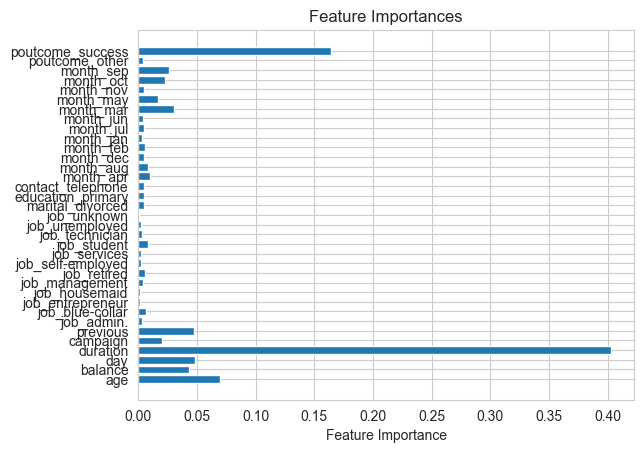

In [115]:
plot_feature_importances(forest)

### Hyperparameters tuning




Leaves:  2 - Train Accuracy: 0.8829381 - Validation Accuracy: 0.8878478
Leaves:  4 - Train Accuracy: 0.8829381 - Validation Accuracy: 0.8878478
Leaves:  6 - Train Accuracy: 0.8829381 - Validation Accuracy: 0.8879919
Leaves:  8 - Train Accuracy: 0.8830822 - Validation Accuracy: 0.8878478
Leaves: 10 - Train Accuracy: 0.8830462 - Validation Accuracy: 0.8878478
Leaves: 12 - Train Accuracy: 0.8831904 - Validation Accuracy: 0.8882802
Leaves: 14 - Train Accuracy: 0.8832264 - Validation Accuracy: 0.8882802
Leaves: 16 - Train Accuracy: 0.8829020 - Validation Accuracy: 0.8878478
Leaves: 18 - Train Accuracy: 0.8830102 - Validation Accuracy: 0.8878478
Leaves: 20 - Train Accuracy: 0.8829381 - Validation Accuracy: 0.8878478
Leaves: 22 - Train Accuracy: 0.8829381 - Validation Accuracy: 0.8878478
Leaves: 24 - Train Accuracy: 0.8830822 - Validation Accuracy: 0.8879919
Leaves: 26 - Train Accuracy: 0.8830462 - Validation Accuracy: 0.8878478
Leaves: 28 - Train Accuracy: 0.8829381 - Validation Accuracy: 0.

Text(0.5, 0, 'max leaves')

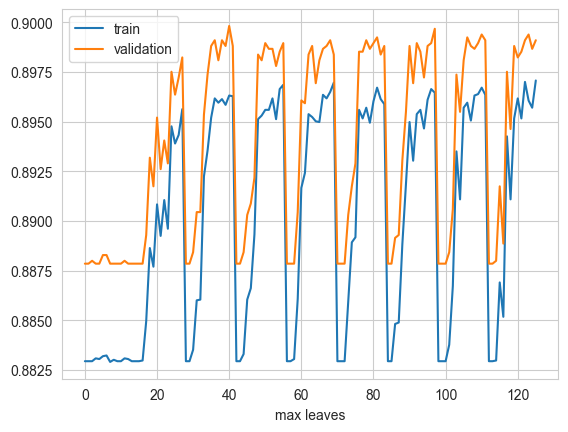

In [116]:
from sklearn.ensemble import RandomForestClassifier


val_accuracies = []
train_accuracies = []
leaves_vals = range(2,30, 2)
models=[]

for depth in range(3,30, 3):
  for max_leaves in leaves_vals:
    # train and predict
    rdc = RandomForestClassifier(max_leaf_nodes=max_leaves,max_depth=depth)
    rdc.fit(X_train,y_train)
    models.append(df)

    # compute Accuracy on train and validation
    train_acc = accuracy_score(y_true=y_train, y_pred=rdc.predict(X_train))
    valid_acc = accuracy_score(y_true=y_valid, y_pred=rdc.predict(X_valid))
    print ("Leaves: {:2d} - Train Accuracy: {:.7f} - Validation Accuracy: {:.7f}".format(
        max_leaves,  train_acc, valid_acc) )

    val_accuracies += [ valid_acc ]
    train_accuracies += [train_acc]

rdc = models[np.argmax(val_accuracies)]
print ( "Best Max Leaves", rdc.max_leaf_nodes, '- Best Depth :', rdc.max_depth)

# we use both training and validation to build the final model, to exploit all training data
rdc.fit(X_train_80,y_train_80)

# Finally, evaluate on test set
test_acc = accuracy_score(y_true=y_test, y_pred=rdc.predict(X_test))
print ("Test Accuracy: {:.3f}".format(test_acc) )

# plot validation vs test accuracies
plt.figure()
plt.plot(train_accuracies)
plt.plot( val_accuracies)
plt.legend(['train','validation'])
plt.xlabel('max leaves')

### Analysing RandomForestClassifier

Now we will:
- plot the tree with graphviz
- use the *feature_importances_ attribute of the RandomForestClassifier to get the importance of the features.
- plot the tree with graphviz



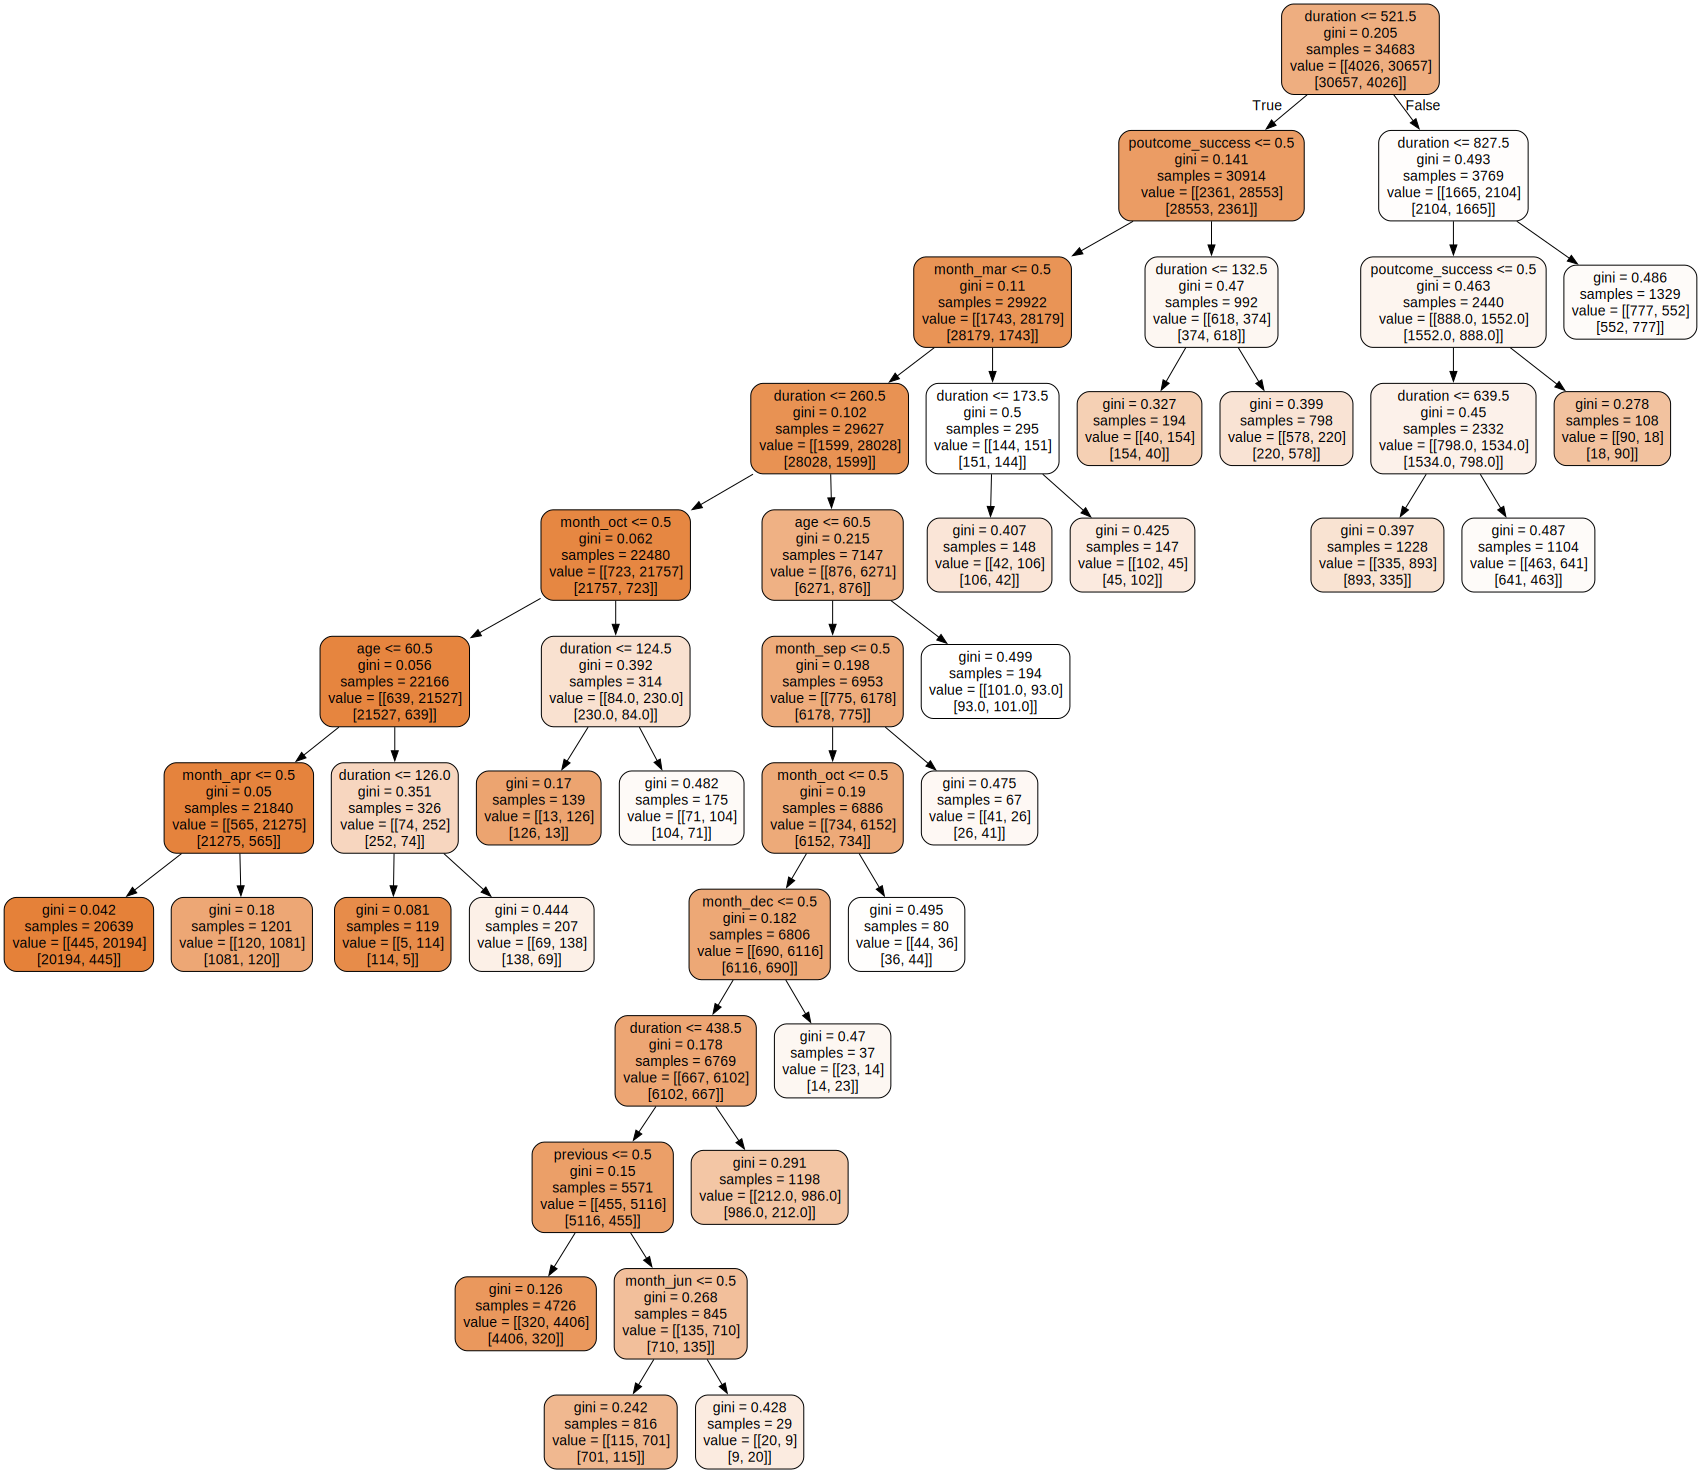

In [ ]:
# Export the decision tree to a dot file
export_graphviz(rdc, out_file='tree_rdc.dot', feature_names=X.columns, class_names=['no', 'yes'], filled=True, rounded=True)

#visualize the decision tree
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph, format='png')

In [118]:
print(f'Features importance:\n {rdc.feature_importances_}')

Features importance:
 [0.03779237 0.         0.01614113 0.53828821 0.         0.00514838
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.01086245 0.00597098 0.00853408
 0.         0.         0.         0.00714691 0.04666669 0.
 0.         0.02843873 0.01436245 0.         0.28064763]


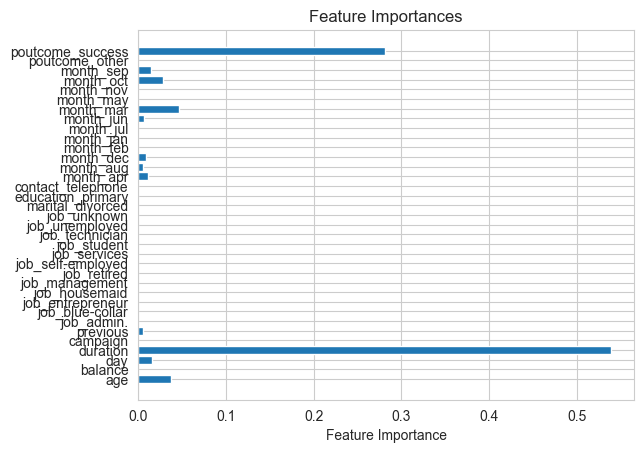

In [119]:
plot_feature_importances(rdc)



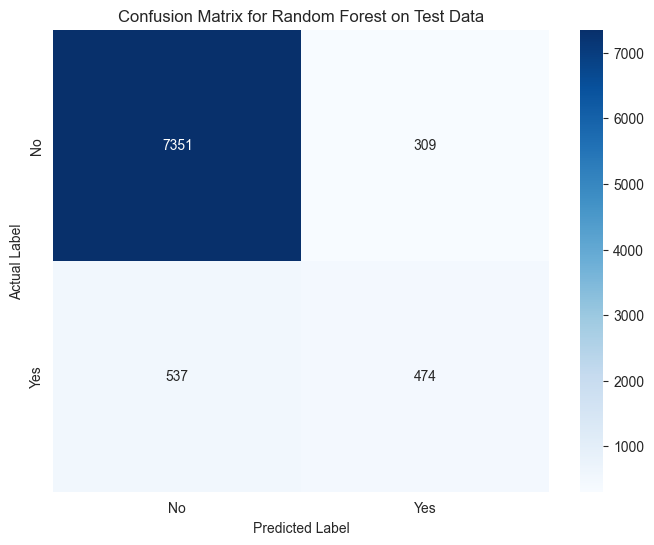

In [120]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your model is already trained: log_reg and use it to predict on X_test
# Ensure X_test is processed similarly to how X_train was processed (e.g., scaling if applied)
y_pred_test = rdc.predict(X_test)

# Generate the confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix for Random Forest on Test Data")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


## Logistic Regresssion

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

# Predict on the validation set
y_pred_val_log = log_reg.predict(X_valid)

# Evaluate the model
accuracy_log = accuracy_score(y_valid, y_pred_val_log)
#f1_log = f1_score(y_valid, y_pred_val_log)

print("Logistic Regression Accuracy:", accuracy_log)
#print("Logistic Regression F1 Score:", f1_log)


Logistic Regression Accuracy: 0.9038489260487242


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score

# Predict on the validation set
y_pred_val = log_reg.predict(X_valid)

# Calculate metrics
accuracy_val = accuracy_score(y_valid, y_pred_val)
#f1_val = f1_score(y_valid, y_pred_val)
roc_auc_val = roc_auc_score(y_valid, log_reg.predict_proba(X_valid)[:, 1])

print("Validation Accuracy:", accuracy_val)
#print("Validation F1 Score:", f1_val)
print("Validation ROC-AUC:", roc_auc_val)


Validation Accuracy: 0.9038489260487242
Validation ROC-AUC: 0.8938681913023807


In [ ]:
from sklearn.model_selection import GridSearchCV

# Set up the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Solver options
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Output the best parameters
print("Best parameters:", grid_search.best_params_)


Best parameters: {'C': 0.1, 'solver': 'liblinear'}


In [ ]:
# Initialize the model with the best parameters
log_reg_optimized = LogisticRegression(**grid_search.best_params_)

# Fit the model on the entire training data
log_reg_optimized.fit(X_train, y_train)

# Validate the optimized model
y_pred_val_opt = log_reg_optimized.predict(X_valid)
accuracy_val_opt = accuracy_score(y_valid, y_pred_val_opt)
#f1_val_opt = f1_score(y_valid, y_pred_val_opt)

print("Optimized Validation Accuracy:", accuracy_val_opt)
#print("Optimized Validation F1 Score:", f1_val_opt)

Optimized Validation Accuracy: 0.9038489260487242


In [ ]:
# Predict on the test set
y_pred_test = log_reg_optimized.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
#f1_test = f1_score(y_test, y_pred_test)

print("Test Accuracy:", accuracy_test)
#print("Test F1 Score:", f1_test)


Test Accuracy: 0.8993195709837389


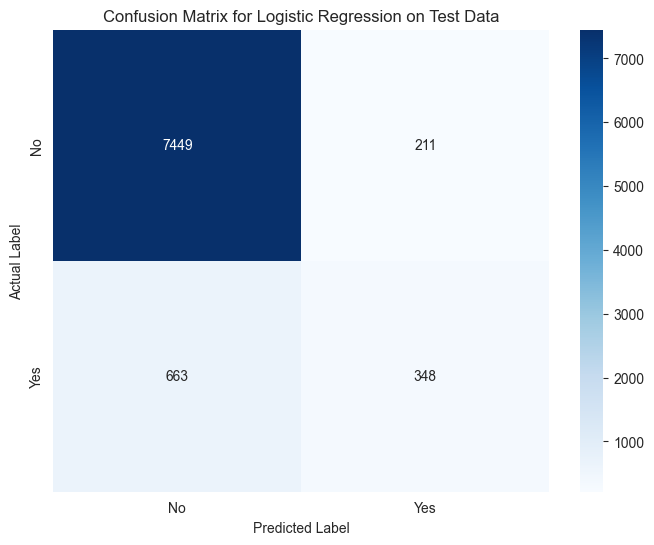

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your model is already trained: log_reg and use it to predict on X_test
# Ensure X_test is processed similarly to how X_train was processed (e.g., scaling if applied)
y_pred_test = log_reg.predict(X_test)

# Generate the confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix for Logistic Regression on Test Data")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# SVC

## Train and Validate the SVM Model

In [121]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Initialize the SVM model
svm = SVC(kernel='linear', probability=True)

In [122]:
# Perform cross-validation to evaluate initial performance
cv_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')

In [124]:
print("Initial CV Accuracy:", cv_scores.mean())
print(f"Scores from each fold: {cv_scores}")

Initial CV Accuracy: 0.8935342882980295
Scores from each fold: [0.89117117 0.88916922 0.8945756  0.8931339  0.89962155]


###  Hyperparameter Tuning Using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient (for non-linear kernels)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Gaussian Naive Bayes

# Error Analysis

### kinds of error we need to take in consideration

- **accuracy** is not a good measure of predictive performance as the number of mistakes doesn't contain all the information we are interested in. We can have some *false positive* (type I error) and *false negative*.
-  **imbalance dataset** 

So for these reasons we need to use a confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

# confusion = 
